**Breast Cancer Research**

Goal is to predict what factors conrtibute most to a malignant tumor. Can also use the trained model to predict whether or not one will develop a malignant tumor. 

Dataset pulled from https://www.kaggle.com/datasets/wasiqaliyasir/breast-cancer-dataset

Practiced EDA and building various regression models (Logistic Regression, Decision Tree, Support Vector Machine, and Random Forest) with pruning/tuning where applicable.

VS Code used for coding. Tweaks in coding made manually. Completion time was less than one hour.

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# To scale the data using z-score
from sklearn.preprocessing import StandardScaler

from sklearn.model_selection import train_test_split

# Algorithms to use
from sklearn.linear_model import LogisticRegression

from sklearn.svm import SVC

from sklearn.tree import DecisionTreeClassifier

from sklearn.ensemble import BaggingClassifier

from sklearn.ensemble import RandomForestClassifier

# Metrics to evaluate the model
from sklearn import metrics
from sklearn.metrics import confusion_matrix, classification_report, precision_recall_curve,recall_score, accuracy_score
from sklearn import tree


# For tuning the model
from sklearn.model_selection import GridSearchCV

# To ignore warnings
import warnings
warnings.filterwarnings("ignore")

In [3]:
#Load the dataset
bc=pd.read_csv("C:\\Users\\rober\\Documents\\Data Science\\Great Learning\\Data files\\Practice Datasets\\Breast_cancer_dataset.csv")

In [4]:
#checking general info
bc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 33 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

In [5]:
bc.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [6]:
#dropping the unnamed column (has no data/significance)
bc.drop(columns=['Unnamed: 32'], inplace=True)

In [7]:
bc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 32 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

In [8]:
#checking statistics of the dataset
bc.describe().T

,count,mean,std,min,25%,50%,75%,max
id,569.0,3.037183e+07,1.250206e+08,8670.000000,869218.000000,906024.000000,8.813129e+06,9.113205e+08
radius_mean,569.0,1.412729e+01,3.524049e+00,6.981000,11.700000,13.370000,1.578000e+01,2.811000e+01
texture_mean,569.0,1.928965e+01,4.301036e+00,9.710000,16.170000,18.840000,2.180000e+01,3.928000e+01
perimeter_mean,569.0,9.196903e+01,2.429898e+01,43.790000,75.170000,86.240000,1.041000e+02,1.885000e+02
area_mean,569.0,6.548891e+02,3.519141e+02,143.500000,420.300000,551.100000,7.827000e+02,2.501000e+03
smoothness_mean,569.0,9.636028e-02,1.406413e-02,0.052630,0.086370,0.095870,1.053000e-01,1.634000e-01
compactness_mean,569.0,1.043410e-01,5.281276e-02,0.019380,0.064920,0.092630,1.304000e-01,3.454000e-01
concavity_mean,569.0,8.879932e-02,7.971981e-02,0.000000,0.029560,0.061540,1.307000e-01,4.268000e-01
concave points_mean,569.0,4.891915e-02,3.880284e-02,0.000000,0.020310,0.033500,7.400000e-02,2.012000e-01
symmetry_mean,569.0,1.811619e-01,2.741428e-02,0.106000,0.161900,0.179200,1.957000e-01,3.040000e-01


In [9]:
#dropping the id column as it has no significance in the analysis
bc.drop(columns=['id'], axis=1, inplace=True)

In [10]:
#remapping the diagnosis column to numerical values
bc['diagnosis'] = bc['diagnosis'].map({'M': 1, 'B': 0})

In [11]:
bc.diagnosis.value_counts(normalize=True)

diagnosis
0    0.627417
1    0.372583
Name: proportion, dtype: float64

In [12]:
# Logistic Regression Model
# Split data into features (X) and target (y)
X = bc.drop('diagnosis', axis=1)
y = bc['diagnosis']

# Split into train and test sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train a logistic regression model
from sklearn.linear_model import LogisticRegression
model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)

# Predict on the test set
y_pred = model.predict(X_test)

# Evaluate the model
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))

Accuracy: 0.956140350877193
Confusion Matrix:
 [[70  1]
 [ 4 39]]


In [13]:
# Decision Tree Classifier
# Split data into features (X) and target (y)
X = bc.drop('diagnosis', axis=1)
y = bc['diagnosis']

# Split into train and test sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train a decision tree model
from sklearn.tree import DecisionTreeClassifier
dt_model = DecisionTreeClassifier(random_state=42)
dt_model.fit(X_train, y_train)

# Predict on the test set
y_pred = dt_model.predict(X_test)

# Evaluate the model
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))

Accuracy: 0.9473684210526315
Confusion Matrix:
 [[68  3]
 [ 3 40]]
Classification Report:
               precision    recall  f1-score   support

           0       0.96      0.96      0.96        71
           1       0.93      0.93      0.93        43

    accuracy                           0.95       114
   macro avg       0.94      0.94      0.94       114
weighted avg       0.95      0.95      0.95       114



In [14]:
# Prune the decision tree by setting max_depth (e.g., max_depth=3)
from sklearn.tree import DecisionTreeClassifier

pruned_dt_model = DecisionTreeClassifier(random_state=42, max_depth=3)
pruned_dt_model.fit(X_train, y_train)

# Predict on the test set
y_pred_pruned = pruned_dt_model.predict(X_test)

# Evaluate the pruned model
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
print("Pruned Tree Accuracy:", accuracy_score(y_test, y_pred_pruned))
print("Pruned Tree Confusion Matrix:\n", confusion_matrix(y_test, y_pred_pruned))
print("Pruned Tree Classification Report:\n", classification_report(y_test, y_pred_pruned))

Pruned Tree Accuracy: 0.9473684210526315
Pruned Tree Confusion Matrix:
 [[69  2]
 [ 4 39]]
Pruned Tree Classification Report:
               precision    recall  f1-score   support

           0       0.95      0.97      0.96        71
           1       0.95      0.91      0.93        43

    accuracy                           0.95       114
   macro avg       0.95      0.94      0.94       114
weighted avg       0.95      0.95      0.95       114



In [15]:
# Train a Support Vector Machine (SVM) model
from sklearn.svm import SVC

svm_model = SVC(kernel='linear', random_state=42)
svm_model.fit(X_train, y_train)

# Predict on the test set
y_pred_svm = svm_model.predict(X_test)

# Evaluate the SVM model
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
print("SVM Accuracy:", accuracy_score(y_test, y_pred_svm))
print("SVM Confusion Matrix:\n", confusion_matrix(y_test, y_pred_svm))
print("SVM Classification Report:\n", classification_report(y_test, y_pred_svm))

SVM Accuracy: 0.956140350877193
SVM Confusion Matrix:
 [[70  1]
 [ 4 39]]
SVM Classification Report:
               precision    recall  f1-score   support

           0       0.95      0.99      0.97        71
           1       0.97      0.91      0.94        43

    accuracy                           0.96       114
   macro avg       0.96      0.95      0.95       114
weighted avg       0.96      0.96      0.96       114



In [16]:
# Train a Random Forest model
from sklearn.ensemble import RandomForestClassifier

rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train, y_train)

# Predict on the test set
y_pred_rf = rf_model.predict(X_test)

# Evaluate the Random Forest model
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
print("Random Forest Accuracy:", accuracy_score(y_test, y_pred_rf))
print("Random Forest Confusion Matrix:\n", confusion_matrix(y_test, y_pred_rf))
print("Random Forest Classification Report:\n", classification_report(y_test, y_pred_rf))

Random Forest Accuracy: 0.9649122807017544
Random Forest Confusion Matrix:
 [[70  1]
 [ 3 40]]
Random Forest Classification Report:
               precision    recall  f1-score   support

           0       0.96      0.99      0.97        71
           1       0.98      0.93      0.95        43

    accuracy                           0.96       114
   macro avg       0.97      0.96      0.96       114
weighted avg       0.97      0.96      0.96       114



In [17]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

# Define the parameter grid
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 3, 5, 10],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Set up GridSearchCV
grid_search = GridSearchCV(
    estimator=RandomForestClassifier(random_state=42),
    param_grid=param_grid,
    cv=5,
    n_jobs=-1,
    scoring='accuracy'
)

# Fit to training data
grid_search.fit(X_train, y_train)

# Best parameters and score
print("Best parameters:", grid_search.best_params_)
print("Best cross-validation accuracy:", grid_search.best_score_)

# Evaluate on test set
best_rf = grid_search.best_estimator_
y_pred_rf = best_rf.predict(X_test)
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
print("Tuned Random Forest Accuracy:", accuracy_score(y_test, y_pred_rf))
print("Tuned Random Forest Confusion Matrix:\n", confusion_matrix(y_test, y_pred_rf))
print("Tuned Random Forest Classification Report:\n", classification_report(y_test, y_pred_rf))

Best parameters: {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 200}
Best cross-validation accuracy: 0.9626373626373625
Tuned Random Forest Accuracy: 0.9649122807017544
Tuned Random Forest Confusion Matrix:
 [[70  1]
 [ 3 40]]
Tuned Random Forest Classification Report:
               precision    recall  f1-score   support

           0       0.96      0.99      0.97        71
           1       0.98      0.93      0.95        43

    accuracy                           0.96       114
   macro avg       0.97      0.96      0.96       114
weighted avg       0.97      0.96      0.96       114



In [18]:
# Get feature importances from the linear SVM model
import pandas as pd
import numpy as np

# Take the absolute value of the coefficients
svm_importance = np.abs(svm_model.coef_[0])
features = X_train.columns

# Create a DataFrame for easy viewing
svm_importance_df = pd.DataFrame({
    'Feature': features,
    'Importance': svm_importance
})

# Sort by importance and display top 10
top_10_svm = svm_importance_df.sort_values(by='Importance', ascending=False).head(10)
print("Top 10 important features for the SVM model:")
print(top_10_svm)

Top 10 important features for the SVM model:
                 Feature  Importance
26       concavity_worst    1.725683
11            texture_se    1.604001
0            radius_mean    1.253315
28        symmetry_worst    1.196817
25     compactness_worst    0.899706
6         concavity_mean    0.674715
27  concave points_worst    0.632678
24      smoothness_worst    0.467786
7    concave points_mean    0.399430
8          symmetry_mean    0.343763


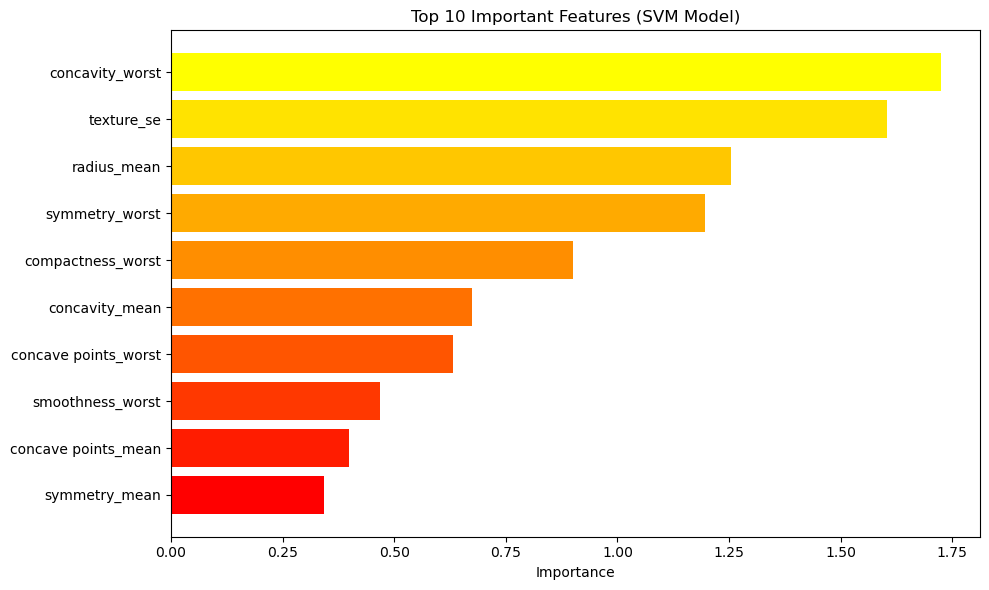

In [19]:
# Visualize the top 10 important features for the SVM model in a bar chart with warm colors
plt.figure(figsize=(10, 6))
plt.barh(top_10_svm['Feature'][::-1], top_10_svm['Importance'][::-1], color=plt.cm.autumn(np.linspace(0, 1, 10)))
plt.xlabel('Importance')
plt.title('Top 10 Important Features (SVM Model)')
plt.tight_layout()
plt.show()

In [20]:
# Get feature importances from the tuned Random Forest model
import pandas as pd
import numpy as np

rf_importances = best_rf.feature_importances_
features = X_train.columns

# Create a DataFrame for easy viewing
rf_importance_df = pd.DataFrame({
    'Feature': features,
    'Importance': rf_importances
})

# Sort by importance and display top 10
top_10_rf = rf_importance_df.sort_values(by='Importance', ascending=False).head(10)
print("Top 10 important features for the tuned Random Forest model:")
print(top_10_rf)

Top 10 important features for the tuned Random Forest model:
                 Feature  Importance
23            area_worst    0.128549
27  concave points_worst    0.128343
22       perimeter_worst    0.127079
7    concave points_mean    0.119801
20          radius_worst    0.069273
6         concavity_mean    0.055773
0            radius_mean    0.050439
3              area_mean    0.042542
26       concavity_worst    0.040747
2         perimeter_mean    0.038349


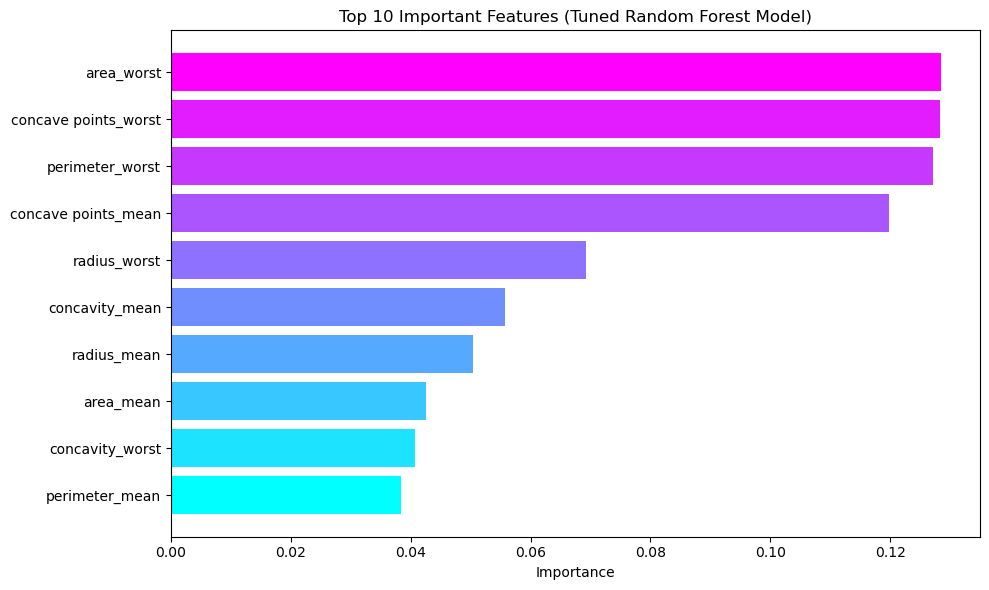

In [21]:
# Visualize the top 10 important features for the tuned Random Forest model in a bar chart with cool colors
plt.figure(figsize=(10, 6))
plt.barh(top_10_rf['Feature'][::-1], top_10_rf['Importance'][::-1], color=plt.cm.cool(np.linspace(0, 1, 10)))
plt.xlabel('Importance')
plt.title('Top 10 Important Features (Tuned Random Forest Model)')
plt.tight_layout()
plt.show()

In [22]:
# Get feature importances from the pruned Decision Tree model
import pandas as pd

pruned_importances = pruned_dt_model.feature_importances_
features = X_train.columns

# Create a DataFrame for easy viewing
pruned_importance_df = pd.DataFrame({
    'Feature': features,
    'Importance': pruned_importances
})

# Sort by importance and display top 10
top_10_pruned = pruned_importance_df.sort_values(by='Importance', ascending=False).head(10)
print("Top 10 important features for the pruned Decision Tree model:")
print(top_10_pruned)

Top 10 important features for the pruned Decision Tree model:
                 Feature  Importance
7    concave points_mean    0.752304
27  concave points_worst    0.071432
20          radius_worst    0.056905
22       perimeter_worst    0.056028
1           texture_mean    0.030106
19  fractal_dimension_se    0.020188
13               area_se    0.013038
4        smoothness_mean    0.000000
8          symmetry_mean    0.000000
6         concavity_mean    0.000000


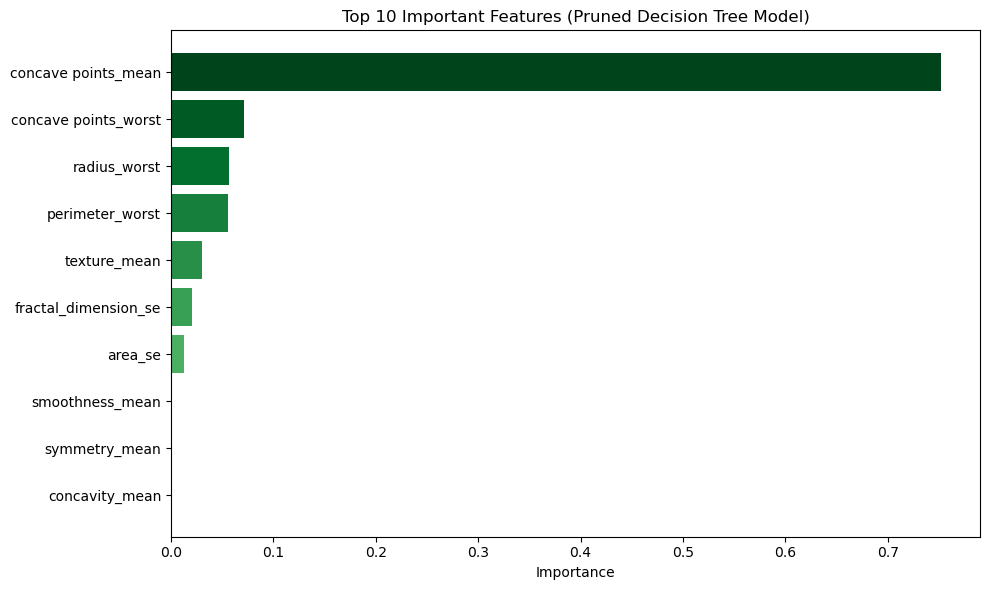

In [23]:
# Visualize the top 10 important features for the pruned Decision Tree model in a bar chart with green colors
plt.figure(figsize=(10, 6))
plt.barh(top_10_pruned['Feature'][::-1], top_10_pruned['Importance'][::-1], color=plt.cm.Greens(np.linspace(0.4, 1, 10)))
plt.xlabel('Importance')
plt.title('Top 10 Important Features (Pruned Decision Tree Model)')
plt.tight_layout()
plt.show()

In [24]:
# Take the absolute value of the coefficients
logreg_importance = np.abs(model.coef_[0])
features = X_train.columns

# Create a DataFrame for easy viewing
logreg_importance_df = pd.DataFrame({
    'Feature': features,
    'Importance': logreg_importance
})

# Sort by importance and display top 10
top_10_logreg = logreg_importance_df.sort_values(by='Importance', ascending=False).head(10)
print("Top 10 important features for the Logistic Regression model:")
print(top_10_logreg)

Top 10 important features for the Logistic Regression model:
                 Feature  Importance
0            radius_mean    1.898701
26       concavity_worst    1.507101
11            texture_se    1.303260
28        symmetry_worst    0.945904
20          radius_worst    0.927146
27  concave points_worst    0.852289
6         concavity_mean    0.738251
7    concave points_mean    0.534392
25     compactness_worst    0.521077
24      smoothness_worst    0.444027


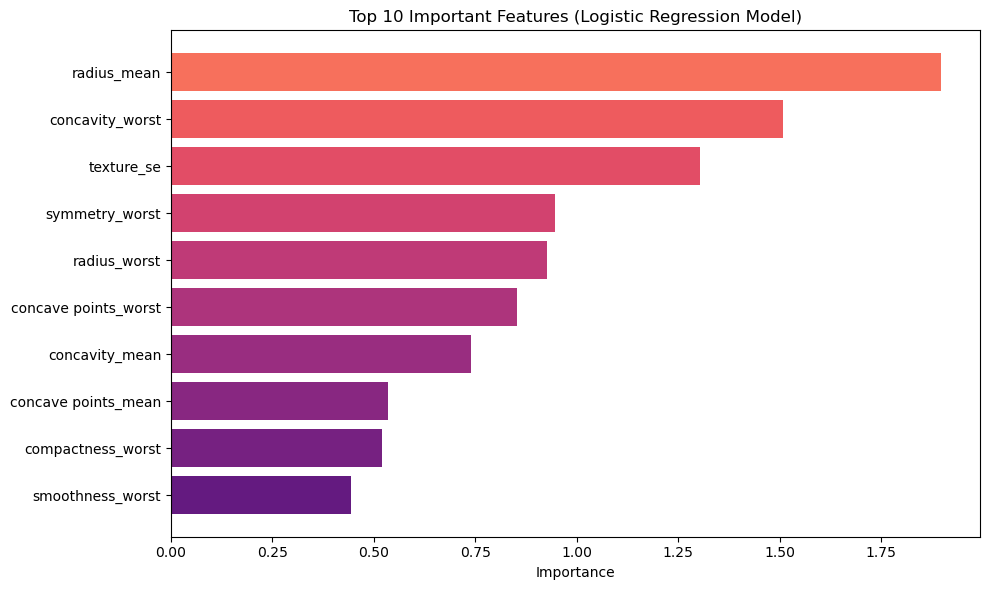

In [25]:
# Visualize the top 10 important features for the Logistic Regression model in a bar chart with soft colors (e.g., purple-pink)
plt.figure(figsize=(10, 6))
plt.barh(top_10_logreg['Feature'][::-1], top_10_logreg['Importance'][::-1], color=plt.cm.magma(np.linspace(0.3, 0.7, 10)))
plt.xlabel('Importance')
plt.title('Top 10 Important Features (Logistic Regression Model)')
plt.tight_layout()
plt.show()

Logistic Regression Classification Report:
              precision    recall  f1-score   support

           0       0.95      0.99      0.97        71
           1       0.97      0.91      0.94        43

    accuracy                           0.96       114
   macro avg       0.96      0.95      0.95       114
weighted avg       0.96      0.96      0.96       114



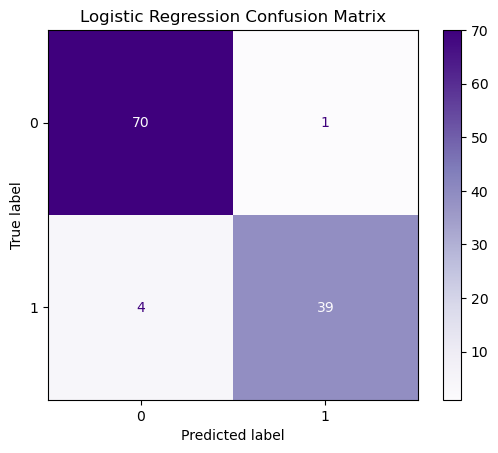

Decision Tree Classification Report:
              precision    recall  f1-score   support

           0       0.96      0.96      0.96        71
           1       0.93      0.93      0.93        43

    accuracy                           0.95       114
   macro avg       0.94      0.94      0.94       114
weighted avg       0.95      0.95      0.95       114



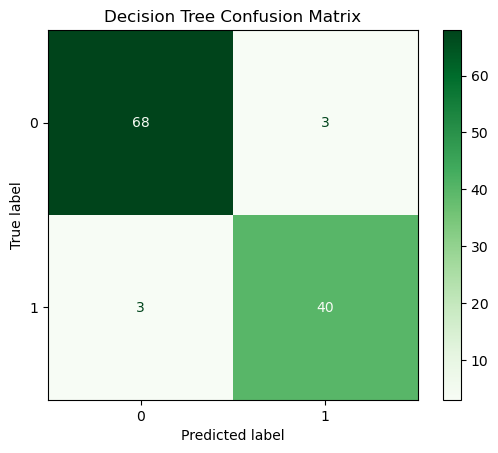

Pruned Decision Tree Classification Report:
              precision    recall  f1-score   support

           0       0.95      0.97      0.96        71
           1       0.95      0.91      0.93        43

    accuracy                           0.95       114
   macro avg       0.95      0.94      0.94       114
weighted avg       0.95      0.95      0.95       114



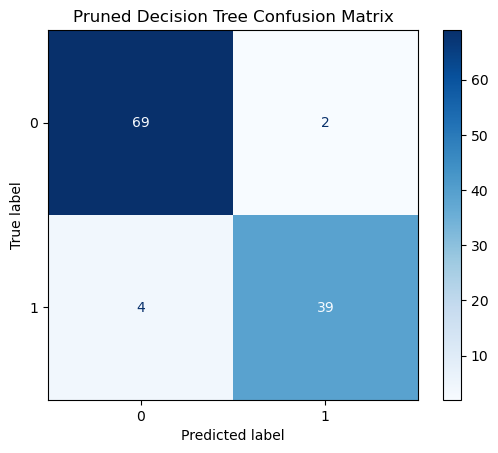

SVM Classification Report:
              precision    recall  f1-score   support

           0       0.95      0.99      0.97        71
           1       0.97      0.91      0.94        43

    accuracy                           0.96       114
   macro avg       0.96      0.95      0.95       114
weighted avg       0.96      0.96      0.96       114



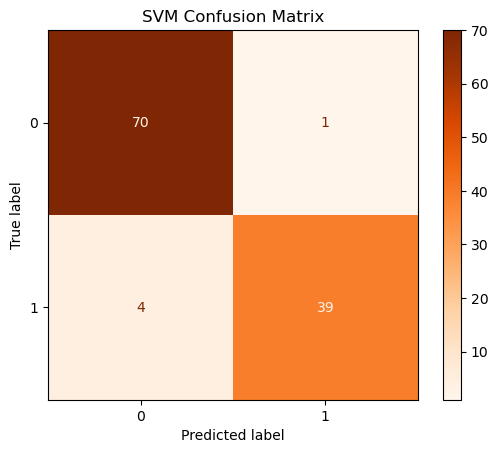

Tuned Random Forest Classification Report:
              precision    recall  f1-score   support

           0       0.96      0.99      0.97        71
           1       0.98      0.93      0.95        43

    accuracy                           0.96       114
   macro avg       0.97      0.96      0.96       114
weighted avg       0.97      0.96      0.96       114



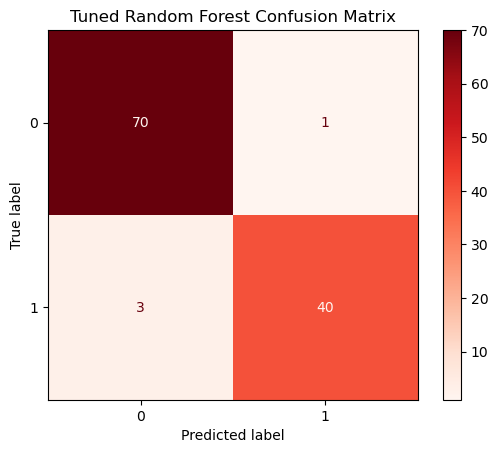

In [26]:
# Visualize confusion matrix and print classification report for each model

from sklearn.metrics import ConfusionMatrixDisplay

# Logistic Regression
print("Logistic Regression Classification Report:")
print(classification_report(y_test, model.predict(X_test)))
ConfusionMatrixDisplay.from_estimator(model, X_test, y_test, cmap='Purples')
plt.title("Logistic Regression Confusion Matrix")
plt.show()

# Decision Tree
print("Decision Tree Classification Report:")
print(classification_report(y_test, dt_model.predict(X_test)))
ConfusionMatrixDisplay.from_estimator(dt_model, X_test, y_test, cmap='Greens')
plt.title("Decision Tree Confusion Matrix")
plt.show()

# Pruned Decision Tree
print("Pruned Decision Tree Classification Report:")
print(classification_report(y_test, pruned_dt_model.predict(X_test)))
ConfusionMatrixDisplay.from_estimator(pruned_dt_model, X_test, y_test, cmap='Blues')
plt.title("Pruned Decision Tree Confusion Matrix")
plt.show()

# SVM
print("SVM Classification Report:")
print(classification_report(y_test, svm_model.predict(X_test)))
ConfusionMatrixDisplay.from_estimator(svm_model, X_test, y_test, cmap='Oranges')
plt.title("SVM Confusion Matrix")
plt.show()

# Tuned Random Forest
print("Tuned Random Forest Classification Report:")
print(classification_report(y_test, best_rf.predict(X_test)))
ConfusionMatrixDisplay.from_estimator(best_rf, X_test, y_test, cmap='Reds')
plt.title("Tuned Random Forest Confusion Matrix")
plt.show()

**Observations**

While all models score very strongly (all 90% or above), The tuned Random Forest model is the most accurate with a 96% score.

Below is the Top 10 important features for said model (reprinted for convenience from above).

In [29]:
#Top 10 important features for the tuned Random Forest model
print("Top 10 important features for the tuned Random Forest model (please disregard the index numbers):")
print(top_10_rf)

Top 10 important features for the tuned Random Forest model (please disregard the index numbers):
                 Feature  Importance
23            area_worst    0.128549
27  concave points_worst    0.128343
22       perimeter_worst    0.127079
7    concave points_mean    0.119801
20          radius_worst    0.069273
6         concavity_mean    0.055773
0            radius_mean    0.050439
3              area_mean    0.042542
26       concavity_worst    0.040747
2         perimeter_mean    0.038349
